<a href="https://colab.research.google.com/github/AndreYang333/ExplainableAI/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI590 Assignment6
## Minjie Yang(my189)
### Link to github:https://github.com/AndreYang333/ExplainableAI.git
### Link to colab: https://colab.research.google.com/github/AndreYang333/ExplainableAI/blob/main/Assignment6.ipynb
### Link to reference code:https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/explainable-ml-example-notebooks/global_explanations.ipynb

### Use random forest regressor model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the California Housing dataset
ca = fetch_california_housing()
X = pd.DataFrame(ca.data, columns=ca.feature_names)
y = ca.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Correlation analysis

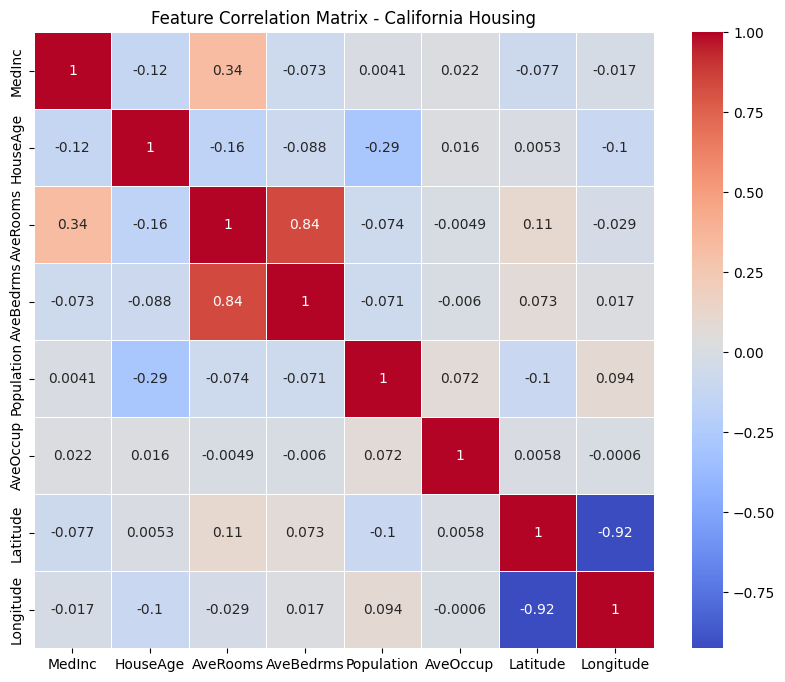

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
corr_matrix = X_train.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix - California Housing")
plt.show()


## ICE and PDP

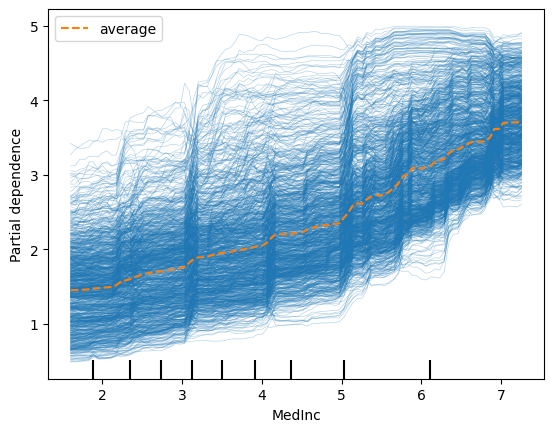

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import numpy as np

# use AveRooms to be the target fearure
features = ['MedInc']

PartialDependenceDisplay.from_estimator(model, X_test, features, kind='both')
plt.show()

The plot is a combination of **Individual Conditional Expectation (ICE)** and **Partial Dependence Plot (PDP)** for the feature `MedInc` (Median Income) from a regression model.

### Key points:
1. **ICE Curves (blue lines)**:
   - Each line shows how changes in `MedInc` affect the predictions for individual data points.
   - The variability across lines indicates that different instances react differently to changes in `MedInc`, suggesting interactions with other features.

2. **PDP (orange dashed line)**:
   - The orange line represents the **average effect** of `MedInc` on the predicted outcome.
   - It shows a positive correlation: as `MedInc` increases, housing price also rises.

### Interesting findings:
1. **Positive Correlation**: As `MedInc` increases, the predicted value increases on average, indicating higher income regions are linked to higher predicted housing prices.
2. **Non-linearity**: The relationship is non-linear—higher `MedInc` values lead to a stronger increase in the predicted target.
3. **Variation among instances**: ICE curves show that different instances respond differently to `MedInc`, highlighting feature interactions.


In [ ]:
X_test['MedInc'].describe()

,MedInc
count,4128.000000
mean,3.830338
std,1.881515
min,0.499900
25%,2.548500
50%,3.500000
75%,4.645925
max,15.000100


### Conduct pdp manually

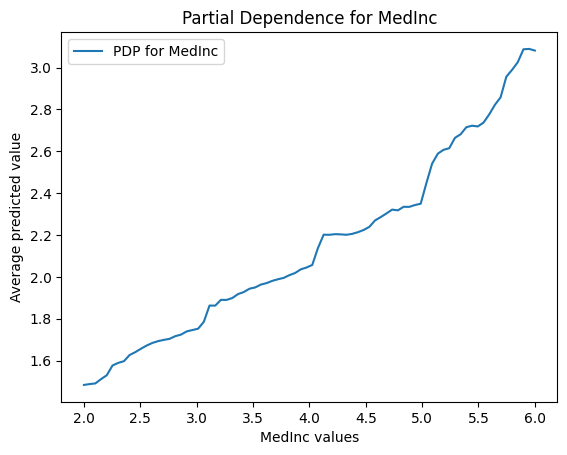

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume the feature you're working with is "MedInc" (Median Income)
feature_name = "MedInc"  # The feature of interest

# Create the feature value grid, update grid size (here num=80 points), Use 2 and 6 because value is more dense here
feature_values = np.linspace(2, 6, num=80)

average_predictions = np.zeros_like(feature_values)

X_modified = X_test.copy()

# Iterate over each feature value
for i, value in enumerate(feature_values):
    # Modify the specific feature value, keeping other features unchanged
    X_modified[feature_name] = value

    # Predict using the modified dataset and get the regression predictions
    predictions = model.predict(X_modified)

    # Compute the average predicted value for the current feature value
    average_predictions[i] = np.mean(predictions)

# Plot the manually generated PDP
plt.plot(feature_values, average_predictions, label=f'PDP for {feature_name}')
plt.xlabel(f'{feature_name} values')
plt.ylabel('Average predicted value')
plt.title(f'Partial Dependence for {feature_name}')
plt.legend()
plt.show()


When we build our own, you will notice we build our own grid of values and can change the size of our grid.

This is why you may see slight variations between the PDP created with numpy versus the PartialDependenceDisplay from scikit learn.

## ALE

In [ ]:
!pip install git+https://github.com/blent-ai/ALEPython.git


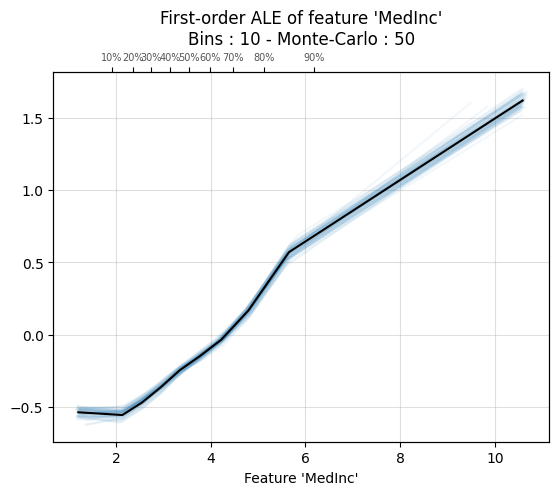

<Axes: title={'center': "First-order ALE of feature 'MedInc'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'MedInc'">

In [ ]:
import alepython.ale as ale

# Generate ALE plot
ale.ale_plot(model, X_train, 'MedInc',monte_carlo=True)


The plot shown is a **ALE** plot for the feature `MedInc`.

### Key components of the plot:
1. **Y-axis (ALE effect)**:
   - The y-axis represents the accumulated local effect of the `MedInc` feature on housing prices. The value shows how much the prediction changes due to changes in the feature, relative to the overall prediction.
   - Positive values indicate that higher `MedInc` leads to higher housing prices, and negative values indicate the opposite.

2. **X-axis (Feature `MedInc`)**:
   - The x-axis shows the values of the feature `MedInc`. These values represent different levels of median income across the dataset.
   - As `MedInc` increases, we can see the corresponding effect on the target variable.

3. **Black Line (ALE curve)**:
   - The black line represents the ALE effect. It shows how the predictions of the model are influenced by changes in `MedInc`.
   - The upward trend in the curve indicates that as median income increases, the predicted value also increases.

4. **Shaded area (Uncertainty bounds)**:
   - The shaded area around the curve represents the uncertainty or variability in the ALE estimation. Wider shaded regions indicate more variability in the effect of `MedInc` on the predictions for different instances in the dataset.

### Interesting findings:
1. **Positive relationship**:
   - The ALE curve shows a positive trend, meaning that as `MedInc` increases, the predicted target value also increases. This makes intuitive sense because areas with higher median income tend to have higher housing prices.
   
2. **Non-linear effect**:
   - The relationship between `MedInc` and the target is **non-linear**. The slope of the curve changes at different points, suggesting that the effect of income on housing prices is stronger at certain ranges.
   - Between `MedInc` values of 4 and 6, the curve shows a more rapid increase, indicating that income levels in this range have a stronger effect on housing prices compared to lower or higher ranges.

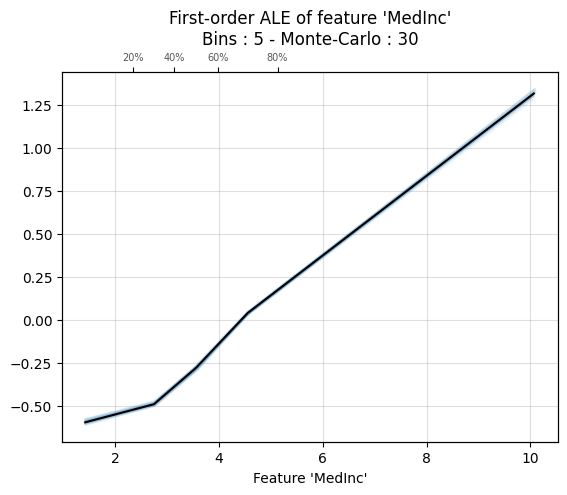

<Axes: title={'center': "First-order ALE of feature 'MedInc'\nBins : 5 - Monte-Carlo : 30"}, xlabel="Feature 'MedInc'">

In [ ]:

# Change hyperparameters for 1D Main Effect ALE Plot
ale.ale_plot(
    model,
    X_train,
    "MedInc",
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)


### **Differences**:
1. **Handling Feature Correlation**:
   - **PDP** assumes `MedInc` is independent of other features, which may not be true in real-world datasets. This can lead to overestimated or underestimated effects.
   - **ALE** corrects for interactions between features by focusing on localized changes in the feature. Thus, ALE gives a more accurate picture when features are correlated.

2. **Interpretation of Effects**:
   - The **PDP** shows a smooth, average effect of `MedInc`, but can be affected by feature correlations.
   - The **ALE** plot shows the **local effect** of `MedInc`, making it a more reliable tool for understanding the direct impact of `MedInc` on predictions, especially in the presence of feature interactions.

3. **Curve Shapes**:
   - Both plots show that `MedInc` has a positive effect on the predictions, but the ALE plot provides a more nuanced view of this effect, capturing steep changes more clearly around `MedInc = 4`.



### Impact on PDP and ALE:
- **PDP**:
  - Since the PDP assumes that features are independent, the moderate correlation between `MedInc` and `AveRooms` (and other features) might distort the PDP results for `MedInc`. The PDP could attribute changes in the predicted outcome to `MedInc` that are actually due to correlated features like `AveRooms`. This is why the PDP can sometimes overestimate or underestimate the impact of a feature when there are correlated predictors.
  
- **ALE**:
  - The ALE plot, on the other hand, accounts for interactions between features by considering local shifts in the data. Therefore, ALE is less sensitive to correlations between features like `MedInc` and `AveRooms`. This makes ALE more robust for interpreting the true effect of `MedInc`, especially when features are correlated, as seen in the matrix.
